Found 67692 files belonging to 131 classes.
Using 54154 files for training.
Found 67692 files belonging to 131 classes.
Using 13538 files for validation.
['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Hucklebe

2024-03-17 17:24:19.693350: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


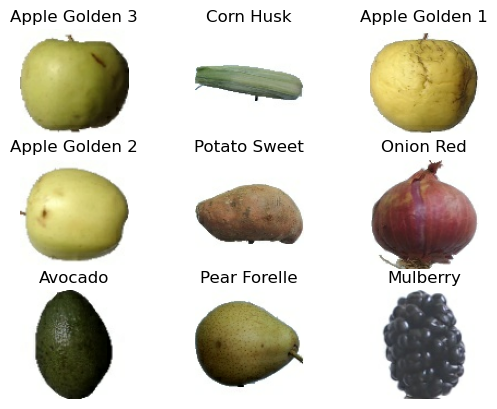

In [29]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np

#tf.data.Dataset
path = "/home/c100rczyk/VSCode/DataSets/Fruits_mini/Training"
#path_test = "/home/c100rczyk/VSCode/DataSets/Fruits_mini/Test"
width_img = 100
height_img = 100

#generowanie zbioru danych tf.data.Dataset z pliku w katalogu
# na dane treningowe i validacyjne
# Przetwarzanie danych na bierząco podczas uczenia sieci. Dane są ładowane do pamięci RAM batchami
produkty_train = keras.utils.image_dataset_from_directory(path, 
                                                          batch_size=64, labels='inferred',
                                                          color_mode='rgb', image_size=(width_img,height_img), shuffle=True,
                                                          validation_split = 0.2, subset="training", seed=187
                                                          )
produkty_val = keras.utils.image_dataset_from_directory(path,
                                                        batch_size=64, labels='inferred',
                                                        color_mode='rgb', image_size=(width_img,height_img), shuffle=True,
                                                        validation_split=0.2, subset="validation", seed=187
                                                        )
# produkty_test = keras.utils.image_dataset_from_directory(path_test,
#                                                          batch_size=64, labels='inferred',
#                                                          color_mode='rgb', image_size=(width_img,height_img), shuffle=True,
#                                                          validation_split = 0.2, subset="test", seed=187
#                                                         )


class_names = produkty_train.class_names
print(class_names)

# bierzemy jeden batch:
for image, labels in produkty_train.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis('off')






In [62]:
train, pp = produkty_train.take(2)
val, kk= produkty_val.take(2)

2024-03-17 17:30:05.776050: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-03-17 17:30:05.811291: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [64]:
# Tworzę pary obrazków. Pary pasujące z etykietą 0 i pary niepasujące z etykietą 1.

print(train[0].shape)
print(val[0].shape)
# def make_pairs(x,y):

# make_pairs(

(64, 100, 100, 3)
(64, 100, 100, 3)
